## Helpdesk Issue Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#READ IN LOCAL DATA
data_raw = pd.read_excel("wingstop.xlsx")

In [3]:
print("Raw data shape:", data_raw.shape, '\n')
print(data_raw.columns)

Raw data shape: (9051, 31) 

Index(['Incident Identifier(NEOS)', 'Created Date',
       'Solution End Date Time TZ (Inc)', 'Duration Hours', 'NEOS1',
       'Team Name (Inc)', 'Master Customer Name (Inc)',
       'Master Customer Number (Inc)', 'Customer Name', 'Site Name (Inc)',
       'City (Inc)', 'Severity Code (Inc)', 'Problem Note Text (Inc)',
       'Action Notes', 'Submitter Name (Inc)',
       'Operational Catogerization Tier 1',
       'Operational Catogerization Tier 2',
       'Operational Catogerization Tier 3', 'NEOS2', 'Product Cat Tier 1',
       'Product Cat Tier 2', 'Product Cat Tier 3', 'Product Cat Tier 4',
       'Resolution Product Cat Tier 1', 'Resolution Product Cat Tier 2',
       'Resolution Product Cat Tier 3', 'Resolution Product Cat Tier 4', 'FCR',
       'RR', 'Closed by', 'Incident Status Description (Inc)'],
      dtype='object')


In [4]:
print(data_raw.dtypes)

Incident Identifier(NEOS)             object
Created Date                          object
Solution End Date Time TZ (Inc)       object
Duration Hours                        object
NEOS1                                 object
Team Name (Inc)                       object
Master Customer Name (Inc)            object
Master Customer Number (Inc)         float64
Customer Name                         object
Site Name (Inc)                       object
City (Inc)                            object
Severity Code (Inc)                  float64
Problem Note Text (Inc)               object
Action Notes                          object
Submitter Name (Inc)                  object
Operational Catogerization Tier 1     object
Operational Catogerization Tier 2     object
Operational Catogerization Tier 3     object
NEOS2                                 object
Product Cat Tier 1                    object
Product Cat Tier 2                    object
Product Cat Tier 3                    object
Product Ca

In [5]:
# FUNCTION TO EXAMINE THE NUMERIC SERIES PROVIDED AND REPLACE VALUES NOT MATCHING THE SPECIFIED
    # DTYPE WITH THE SERIES MEDIAN
    
def correct_dtype(df, series, dtype):
    df.loc[df[series].map(type) != dtype, series] \
        = df.loc[df[series].map(type) == dtype, series].median()

In [6]:
correct_dtype(data_raw, "Duration Hours", float)

In [7]:
# CORRECT DTYPES OF COLUMNS BASED ON DOMAIN KNOWLEDGE

data_raw['Severity Code (Inc)'] = data_raw['Severity Code (Inc)'].astype("object")
data_raw['FCR'] = data_raw['FCR'].astype("object")
data_raw['RR'] = data_raw['RR'].astype("object")

data_raw['Product Cat Tier 1'] = data_raw['Product Cat Tier 1'].astype("string")
data_raw['Product Cat Tier 2'] = data_raw['Product Cat Tier 2'].astype("string")
data_raw['Product Cat Tier 3'] = data_raw['Product Cat Tier 3'].astype("string")

In [8]:
# DROP COLUMNS OUTSIDE THE SCOPE OF THIS CLASSIFICATION MODEL

drop_columns= ["Incident Identifier(NEOS)", "Solution End Date Time TZ (Inc)", "NEOS1", 
               "Created Date", "Master Customer Name (Inc)", "Master Customer Number (Inc)", 
               "Customer Name", "Site Name (Inc)", 'City (Inc)', "Submitter Name (Inc)", 
               "Operational Catogerization Tier 1", "Operational Catogerization Tier 2",
               "Operational Catogerization Tier 3", "Product Cat Tier 4", "Resolution Product Cat Tier 1", 
               "Resolution Product Cat Tier 2", "Resolution Product Cat Tier 3", 
               "Resolution Product Cat Tier 4", "NEOS2", "Closed by", 
               "Incident Status Description (Inc)"]
df1 = data_raw.drop(drop_columns, axis=1)
print(df1.columns)

Index(['Duration Hours', 'Team Name (Inc)', 'Severity Code (Inc)',
       'Problem Note Text (Inc)', 'Action Notes', 'Product Cat Tier 1',
       'Product Cat Tier 2', 'Product Cat Tier 3', 'FCR', 'RR'],
      dtype='object')


In [9]:
# SIMPLIFY COLUMN NAMES

cols_names= ["age_hours","team","sev","problem_notes","action_notes",
            "prod_cat1","prod_cat2","prod_cat3", "FCR","RR"]
df1.columns = cols_names
df1.dtypes

age_hours        object
team             object
sev              object
problem_notes    object
action_notes     object
prod_cat1        string
prod_cat2        string
prod_cat3        string
FCR              object
RR               object
dtype: object

<AxesSubplot:title={'center':'Missing Values'}, xlabel='Columns', ylabel='Percentage / Count'>

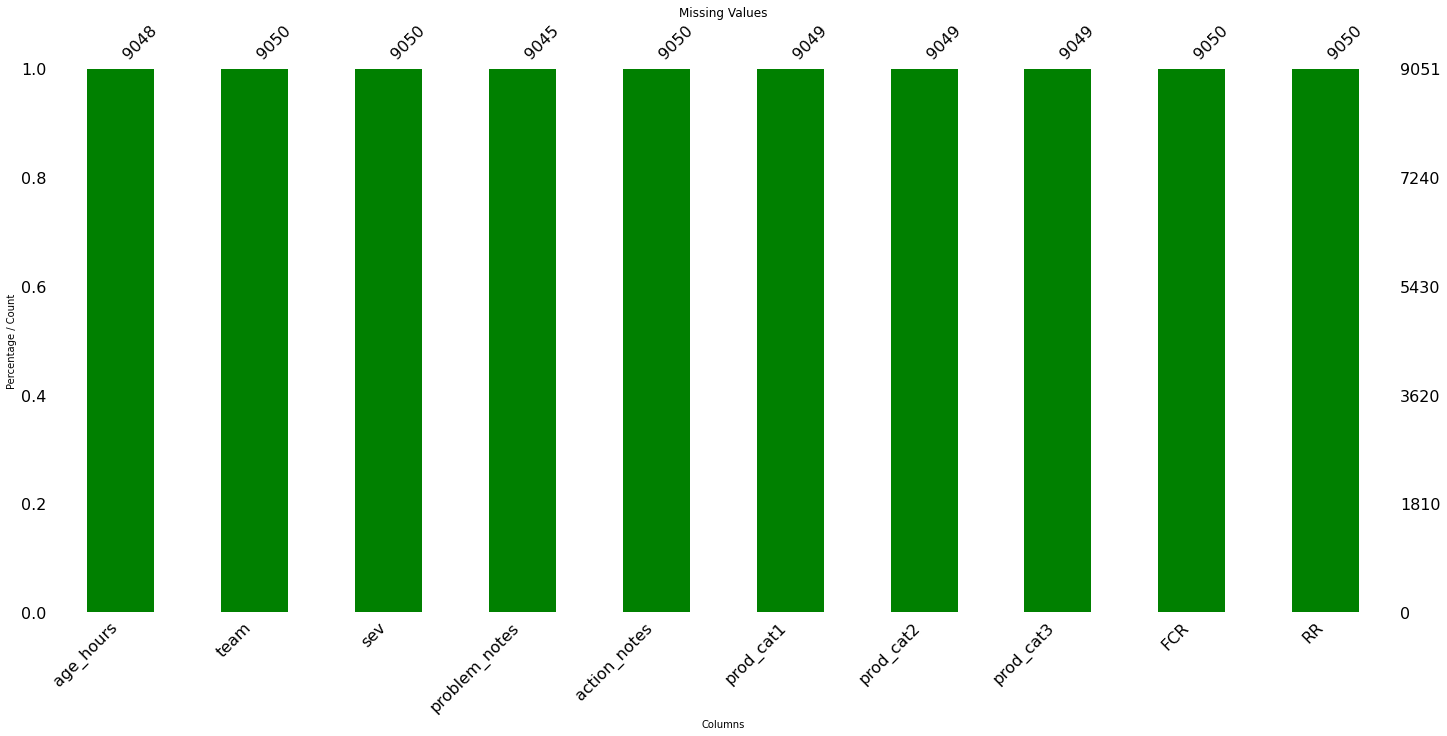

In [10]:
# CHECK FOR MISSING VALUES

import missingno as msno
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage / Count')
ax.set_title('Missing Values')
msno.bar(df1, color='green')

In [11]:
# IMPUTE MISSING VALUES IN AGE_HOURS USING MEDIAN() 

df1.age_hours.fillna(df1.age_hours.median(), inplace=True)
df1.age_hours.isna().sum()

0

## DF2

In [12]:
# VALUES FROM REMAINING CATEGORICAL /TEXT COLUMNS CANNOT BE IMPUTED, DROPPING THESE ROWS

df2 = df1.dropna()
df2.reset_index(drop=True, inplace=True)

<AxesSubplot:title={'center':'Missing Values'}, xlabel='Columns', ylabel='Percentage / Count'>

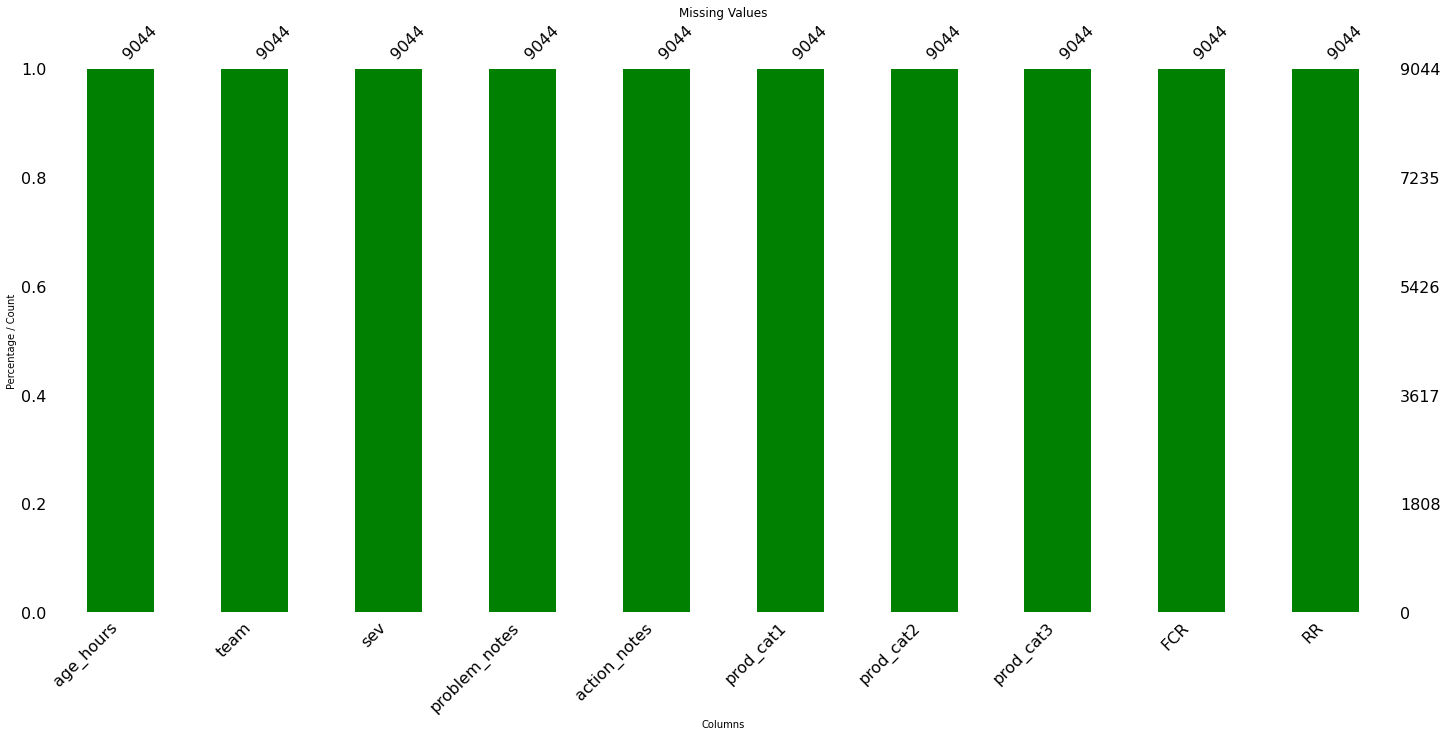

In [13]:
# MAKE SURE NO MISSING VALUES REMAIN

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage / Count')
ax.set_title('Missing Values')
msno.bar(df2, color='green')

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (Hrs)', ylabel='Count in Bin'>

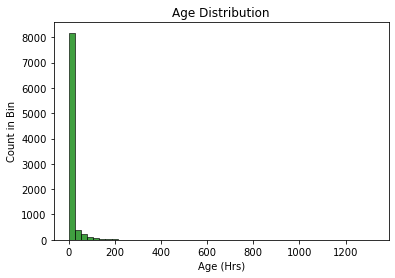

In [14]:
# CHECK FOR OUTLIERS WITHIN AGE_HOURS

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Hrs)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution')
sns.histplot(x='age_hours', data=df2, bins=50, color='green')

In [15]:
# CHECK PERCENTAGE OF CASES OUTSIDE THE TARGET THRESHOLD

print("Percentage of cases with Age > 300 hrs\n", 
      round(len(df2[df2['age_hours'] > 300]) / len(df2), 3), "%")

Percentage of cases with Age > 300 hrs
 0.002 %


In [16]:
# REPLACE OUTLIER VALUES WITH IMPUTED MEDIAN

df2.loc[df2.age_hours > 300, "age_hours"] = df2.loc[df2.age_hours < 300, "age_hours"].median()

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age (Hrs)', ylabel='Count in Bin'>

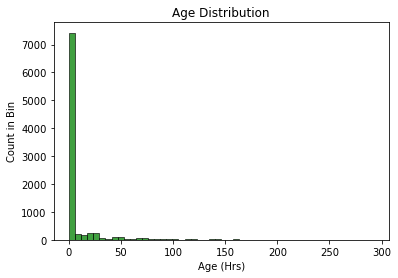

In [17]:
# CHECK FOR OUTLIERS WITHIN AGE_HOURS AGAIN

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Age (Hrs)')
ax.set_ylabel('Count in Bin')
ax.set_title('Age Distribution')
sns.histplot(x='age_hours', data=df2, bins=50, color='green')

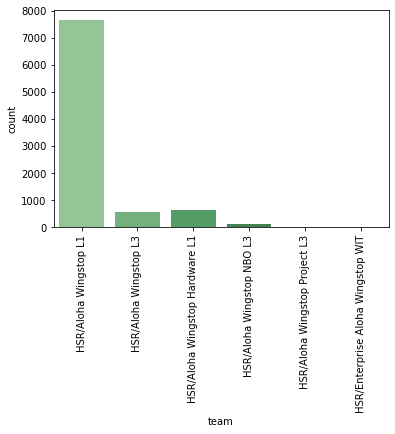

In [18]:
# CHECK DISTRIBUTION OF TEAM FEATURE

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='team', data=df2, palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

In [19]:
# ITERATE THROUGH THE TEAM SERIES, EVALUATE STR OBJECTS THAT CONTAIN 'L1' AND POPULATE 'L1' FEATURE
# VALUE OF 1 INDICATES L1, VALUE OF 0 INDICATES L3

df2.loc[:,"L1"] = 0
for x in range(len(df2.team)):
    if df2.team[x].find(" L1") > 0:
        df2.loc[x, "L1"] = 1
    else:
        df2.loc[x, "L1"] = 0

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


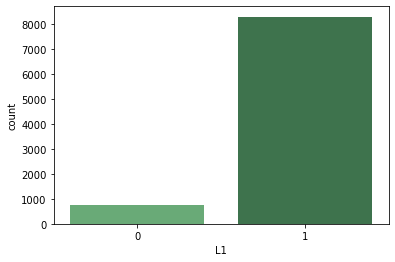

In [20]:
# SHOW CLASS BALANCE OF NEW L1 FEATURE

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='L1', data=df2, palette='Greens_d')
plt.show()

In [21]:
# MERGE TOGETHER THE TEXT COLUMNS FOR PROD_CAT, AS EVERY TICKET WILL HAVE SOME COMBINATION OF 
    # ALL 3 OF THESE TOGETHER. SO EACH COMBINATION REPRESENTS 1 CLASS IN THE CATEGORICAL FEATURE

df2.loc[:,"prod_cat"] = df2.loc[:,"prod_cat1"]
for i in range(len(df2.prod_cat)):
    df2.loc[i, "prod_cat"] = df2.loc[i, "prod_cat1"] + "," + df2.loc[i, "prod_cat2"] + "," + df2.loc[i, "prod_cat3"]

# REMOVE LABELS NOT OCCURRING AT LEAST 10 TIMES

ind_list= list(df2.prod_cat.value_counts()[df2.prod_cat.value_counts() < 25].index)
df2= df2.loc[~df2['prod_cat'].isin(ind_list)]
df2.prod_cat.value_counts()

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


z_Third Party,Third Party SW Not Working,Third Party SW Not Working    633
z_NCR Back Office,Sales,Sales                                          497
z_Aloha POS,Front Of House,Missing employee                            450
z_NCR Back Office,Labor,Labor                                          415
z_Aloha POS,Site/Store Down,Determining File Server                    396
                                                                      ... 
z_Aloha POS,Front Of House,Can't assign drawer                          27
z_Terminal,Power,Randomly Shuts Off                                     26
z_Terminal,Power,HW Failure                                             26
z_Terminal,Time / Date,Time Incorrect                                   25
z_Electronic Draft Capture,Back Of House,Refund                         25
Name: prod_cat, Length: 64, dtype: Int64

In [22]:
# DROP INDIVIDUAL PROD_CAT COLUMNS AFTER CONCAT

print("Before column drop:",df2.shape)
df2.drop(["prod_cat1", "prod_cat2", "prod_cat3"], axis=1, inplace=True)
print("After column drop:",df2.shape)

Before column drop: (8224, 12)
After column drop: (8224, 9)


In [23]:
df2.head()

,age_hours,team,sev,problem_notes,action_notes,FCR,RR,L1,prod_cat
0,0.046389,HSR/Aloha Wingstop L1,1.0,1. Site Name/Site Number (GEMS): 38 \n2. Po...,2022-03-31 23:11 - dv250157\nGeneral Informati...,1.0,0.0,1,"z_PinPad / CC Machine,Display,Incorrect Screen"
1,0.065278,HSR/Aloha Wingstop L1,2.0,Employee export,2022-03-31 23:23 - vb250277\nWorking Log: Fiel...,1.0,0.0,1,"z_NCR Back Office,Database,Database"
2,0.821667,HSR/Aloha Wingstop L1,0.0,WNG - Store offline - Internet issue,2022-04-01 00:09 - dv250157\nWorking Log: Fiel...,1.0,0.0,1,"z_Third Party,Internet Service Provider,Intern..."
3,12.002778,HSR/Aloha Wingstop L1,0.0,WNG - All terms down,2022-04-01 00:18 - dv250157\nWorking Log: Fiel...,0.0,0.0,1,"z_Aloha POS,Site/Store Down,Determining File S..."
4,14.766944,HSR/Aloha Wingstop L1,2.0,FOH-Printer rerouting,2022-04-01 01:00 - vv250206\nWorking Log: Fiel...,0.0,0.0,1,"z_Printer,Won't Print,HW Failure"


In [24]:
# CORRECT DATA TYPE AGAIN FOR VARIOUS NUMERIC COLUMNS THAT SHOULD BE CATEGORICAL

df2.FCR = [str(int(x)) for x in df2["FCR"]]
df2.RR = [str(int(x)) for x in df2["RR"]]
df2.L1 = [str(x) for x in df2["L1"]]
df2.sev = [str(int(x)) for x in df2["sev"]]
df2.dtypes

age_hours        float64
team              object
sev               object
problem_notes     object
action_notes      object
FCR               object
RR                object
L1                object
prod_cat          string
dtype: object

In [25]:
# GENERATE TARGET (Y) VARIABLE, AN 80/20 SPLIT OF 1=INACCURATE and 0=ACCURATE, SIMULATING REAL
    # CATEGORIZATION ACCURACY. THE TARGET VARIABLE IS THE NEGATIVE CLASS
# GENERATED FEATURE VARIABLE IS RANDOMIZED

N = int(df2.shape[0] * 0.8)
K = int(df2.shape[0] * 0.2 + 1) # K zeros, N-K ones
arr = np.array([1] * K + [0] * (N))
np.random.shuffle(arr)

df2["correct_cat"] = arr
#df2.loc[:,"correct_cat"] = df2["correct_cat"].astype(object)
df2.correct_cat.describe()

count    8224.000000
mean        0.200024
std         0.400043
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: correct_cat, dtype: float64

In [26]:
# ENGINEER NEW FEATURES FOR LEN() OF USER ENTRY FIELDS

df2["prob_notes_len"] = [len(x) for x in df2.problem_notes]
df2["act_notes_len"] = [len(x) for x in df2.action_notes]

<AxesSubplot:title={'center':'Len() of Problem Notes'}, xlabel='Number of characters', ylabel='Count'>

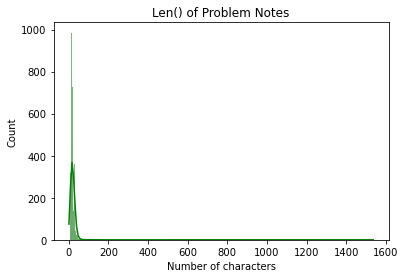

In [27]:
# COMPARE LEN OF PROB NOTES AND ACT NOTES, BOTH WILL SURELY NEED TO BE REGULARIZED FOR ML

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_title('Len() of Problem Notes')
ax.set_xlabel('Number of characters')
sns.histplot(data=df2, x="prob_notes_len", color="green", kde=True)

<AxesSubplot:title={'center':'Len() of Action Notes'}, xlabel='Number of characters', ylabel='Count'>

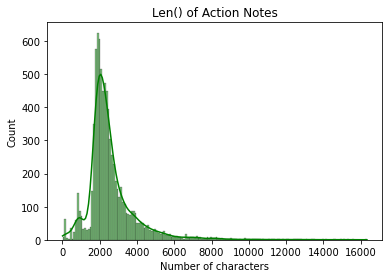

In [28]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Number of characters')
ax.set_title('Len() of Action Notes')
sns.histplot(data=df2, x="act_notes_len", color="green", kde=True)

In [29]:
### FUNCTION TO TAKE A SERIES OF TEXT AND CLEAN IT, REMOVING SPECIAL CHARACTERS, 
    ### REPLACING NEW LINES WITH " ", AND LOWER() ON EVERYTHING

def clean_text(series): 
    new_series = series.str.replace('[^a-zA-Z \n]', '')
    new_series = new_series.str.replace('\n', ' ')
    new_series = new_series.str.lower()
    return new_series

In [30]:
df2.reset_index(drop=True, inplace=True)

## DF3

In [31]:
# COMBINE PROBLEM_NOTES AND ACTION_NOTES SINCE THEY ARE COMPARABLE FIELDS THAT CAN BE VECTORIZED TOGETHER

prob_series= clean_text(df2['problem_notes'])
act_series= clean_text(df2['action_notes'])

df3= df2.drop(['action_notes', 'problem_notes'], axis=1)
df3.loc[:,"combined_notes"] = [(prob_series[x] + act_series[x]) for x in range(len(df2))]
print(df3.combined_notes.head())

C:\Users\DP185257\AppData\Local\Temp/ipykernel_17240/1607333787.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_series = series.str.replace('[^a-zA-Z \n]', '')


0     site namesite number gems       point of cont...
1    employee export    vb working log field values...
2    wng  store offline  internet issue   dv workin...
3    wng  all terms down   dv working log field val...
4    fohprinter rerouting    vv working log field v...
Name: combined_notes, dtype: object


***
##### NOTE: CLEANING NUMBERS FROM NOTES REMOVES REFERENCES LIKE T1 ETC
*May reconsider this for future scope*
***

In [32]:
df3.columns

Index(['age_hours', 'team', 'sev', 'FCR', 'RR', 'L1', 'prod_cat',
       'correct_cat', 'prob_notes_len', 'act_notes_len', 'combined_notes'],
      dtype='object')

In [33]:
# FUNCTION TO APPLY GET_DUMMIES TO A SPECIFIED CATEGORICAL FEATURE, THEN DROP ORIGINAL COLUMN

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [34]:
df_cat= df3

## DF4

In [35]:
df4= encode_and_bind(df3, 'prod_cat')
df4.columns

Index(['age_hours', 'team', 'sev', 'FCR', 'RR', 'L1', 'correct_cat',
       'prob_notes_len', 'act_notes_len', 'combined_notes',
       'z_Aloha Manager / CFC,Employees,Configuration',
       'z_Aloha POS,CTLSVR/Control Service,Stopped',
       'z_Aloha POS,End Of Day,Waiting for End Of Day to Complete',
       'z_Aloha POS,Front Of House,Can't assign drawer',
       'z_Aloha POS,Front Of House,Checkout issue',
       'z_Aloha POS,Front Of House,Clock In/Clock Out issues',
       'z_Aloha POS,Front Of House,Enroll fingerprint',
       'z_Aloha POS,Front Of House,Missing employee',
       'z_Aloha POS,Front Of House,Order Entry',
       'z_Aloha POS,Menu,Configuration', 'z_Aloha POS,Price,Configuration',
       'z_Aloha POS,Site/Store Down,Determining File Server',
       'z_Aloha POS,Terminal Down,Determining File Server',
       'z_Aloha Payment Solution,D\ No response,Front Of House',
       'z_Aloha Payment Solution,Service Back Of House,Stopped',
       'z_Aloha Takeout,Front Of Ho

In [36]:
df4.team.values

array(['HSR/Aloha Wingstop L1', 'HSR/Aloha Wingstop L1',
       'HSR/Aloha Wingstop L1', ..., 'HSR/Aloha Wingstop L3',
       'HSR/Aloha Wingstop L1', 'HSR/Aloha Wingstop L1'], dtype=object)

## DF5

In [37]:
df5= encode_and_bind(df4, 'team')
df5.columns

Index(['age_hours', 'sev', 'FCR', 'RR', 'L1', 'correct_cat', 'prob_notes_len',
       'act_notes_len', 'combined_notes',
       'z_Aloha Manager / CFC,Employees,Configuration',
       'z_Aloha POS,CTLSVR/Control Service,Stopped',
       'z_Aloha POS,End Of Day,Waiting for End Of Day to Complete',
       'z_Aloha POS,Front Of House,Can't assign drawer',
       'z_Aloha POS,Front Of House,Checkout issue',
       'z_Aloha POS,Front Of House,Clock In/Clock Out issues',
       'z_Aloha POS,Front Of House,Enroll fingerprint',
       'z_Aloha POS,Front Of House,Missing employee',
       'z_Aloha POS,Front Of House,Order Entry',
       'z_Aloha POS,Menu,Configuration', 'z_Aloha POS,Price,Configuration',
       'z_Aloha POS,Site/Store Down,Determining File Server',
       'z_Aloha POS,Terminal Down,Determining File Server',
       'z_Aloha Payment Solution,D\ No response,Front Of House',
       'z_Aloha Payment Solution,Service Back Of House,Stopped',
       'z_Aloha Takeout,Front Of House,Orde

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(stop_words='english',
                    min_df=10, ngram_range=(1,3))

# Fit the vectorizer and transform the data
tv_transformed = tv.fit_transform(df3['combined_notes'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')

In [39]:
tv_df.shape

(8224, 17226)

## DF6

In [40]:
df6 = pd.concat([df5, tv_df], axis=1)
df6.head()

,age_hours,sev,FCR,RR,L1,correct_cat,prob_notes_len,act_notes_len,combined_notes,"z_Aloha Manager / CFC,Employees,Configuration",...,TFIDF_zn reason,TFIDF_zn reason action,TFIDF_zn reason field,TFIDF_zn status,TFIDF_zn status marked,TFIDF_zn working,TFIDF_zn working log,TFIDF_zn zn,TFIDF_zn zn working,TFIDF_zn zn zn
0,0.046389,1,1,0,1,0,1048,3173,site namesite number gems point of cont...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.065278,2,1,0,1,0,16,2405,employee export vb working log field values...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.821667,0,1,0,1,0,36,2279,wng store offline internet issue dv workin...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.002778,0,0,0,1,1,20,4715,wng all terms down dv working log field val...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.766944,2,0,0,1,0,22,3009,fohprinter rerouting vv working log field v...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# SPLIT DEPENDENT AND INDEPENDENT VARIABLES INTO X, Y

X = df6.drop(['correct_cat', 'combined_notes'], axis=1)
y = df6['correct_cat'].values.flatten()
print(X.shape)
print(y.shape)

(8224, 17303)
(8224,)


In [42]:
from sklearn.model_selection import train_test_split
#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6168, 17303) (2056, 17303)
(6168,) (2056,)


In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier

## MODELING 

In [44]:
# CREATE RANDOM FOREST PIPELINE

pipe = make_pipeline(
    PowerTransformer(),
    RandomForestClassifier(random_state=123)
)

In [45]:
banana banana

SyntaxError: invalid syntax (Temp/ipykernel_17240/70184482.py, line 1)

In [ ]:
# FIT AND PREDICT PIPELINE

pipe.fit(X_train, y_train)

y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print("Report on Test Set: \n", classification_report(y_test,y_te_pred))
print("\n \nReport on Test Set: \n", classification_report(y_train,y_tr_pred))

## GRADIENT BOOSTER

In [ ]:
# CREATE GRADIANT_BOOSTER PIPELINE

from sklearn.ensemble import GradientBoostingClassifier

pipe2 = make_pipeline(
    PowerTransformer(),
    GradientBoostingClassifier(random_state=123)
)

In [ ]:
# FIT AND PREDICT PIPELINE

pipe2.fit(X_train, y_train)

#y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,y_te_pred))

***
Both models predict almost entirely the majority class, making these models fairly useless. 
***

## LOGISTIC REGRESSION

In [49]:
# CREATE LOGISTIC_REGRESSION PIPELINE

from sklearn.linear_model import LogisticRegression

pipe3 = make_pipeline(
    PowerTransformer(),
    LogisticRegression(random_state=123)
)

In [ ]:
# FIT AND PREDICT PIPELINE

pipe3.fit(X_train, y_train)

#y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,y_te_pred))

## PROBLEM 2: PROD_CAT PREDICTION

In [46]:
# LABEL PREDICTION PROBLEM FOR PROD_CAT

X_cat= tv_df
y_cat= df3.loc[:,"prod_cat"]

y_cat.value_counts()

z_Third Party,Third Party SW Not Working,Third Party SW Not Working    633
z_NCR Back Office,Sales,Sales                                          497
z_Aloha POS,Front Of House,Missing employee                            450
z_NCR Back Office,Labor,Labor                                          415
z_Aloha POS,Site/Store Down,Determining File Server                    396
                                                                      ... 
z_Aloha POS,Front Of House,Can't assign drawer                          27
z_Terminal,Power,Randomly Shuts Off                                     26
z_Terminal,Power,HW Failure                                             26
z_Terminal,Time / Date,Time Incorrect                                   25
z_Electronic Draft Capture,Back Of House,Refund                         25
Name: prod_cat, Length: 64, dtype: Int64

In [47]:
# SPLIT INTO TEST AND TRAINING SETS

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6168, 17226) (2056, 17226)
(6168,) (2056,)


### MODEL 1: LOGISTIC REGRESSOR

In [50]:
# CREATE AND FIT LOGISTIC REGRESSOR

LogReg_cat= LogisticRegression(random_state=123)
LogReg_cat.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [51]:
y_pred= LogReg_cat.predict(X_test)

In [58]:
# PREDICTIONS OF CLASSES THAT HAD >10 SAMPLES IN THE TEST SET DID PRETTY WELL

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                                                          precision    recall  f1-score   support

                           z_Aloha Manager / CFC,Employees,Configuration       0.69      0.85      0.76        13
                              z_Aloha POS,CTLSVR/Control Service,Stopped       0.89      0.93      0.91        27
               z_Aloha POS,End Of Day,Waiting for End Of Day to Complete       1.00      0.94      0.97        16
                          z_Aloha POS,Front Of House,Can't assign drawer       0.67      0.40      0.50         5
                               z_Aloha POS,Front Of House,Checkout issue       0.89      0.94      0.91        17
                    z_Aloha POS,Front Of House,Clock In/Clock Out issues       0.73      0.52      0.61        21
                           z_Aloha POS,Front Of House,Enroll fingerprint       0.77      0.83      0.80        12
                             z_Aloha POS,Front Of House,Missing employee       0.92    

C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MODEL 2: SVM.LINEAR_SVC

In [59]:
from sklearn import svm

svm_model= svm.LinearSVC(random_state=123)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=123)

In [60]:
y_pred= svm_model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

                                                                          precision    recall  f1-score   support

                           z_Aloha Manager / CFC,Employees,Configuration       0.69      0.85      0.76        13
                              z_Aloha POS,CTLSVR/Control Service,Stopped       0.84      0.96      0.90        27
               z_Aloha POS,End Of Day,Waiting for End Of Day to Complete       1.00      0.94      0.97        16
                          z_Aloha POS,Front Of House,Can't assign drawer       0.60      0.60      0.60         5
                               z_Aloha POS,Front Of House,Checkout issue       0.74      0.82      0.78        17
                    z_Aloha POS,Front Of House,Clock In/Clock Out issues       0.67      0.57      0.62        21
                           z_Aloha POS,Front Of House,Enroll fingerprint       0.67      0.83      0.74        12
                             z_Aloha POS,Front Of House,Missing employee       0.89    

C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DP185257\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
